# Praca domowa 4
# Grzegorz Kiersnowski


## Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu numpy oraz pandas odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

### a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
df_a = df[(df.Publisher == 'Nintendo') & (df.NA_Sales < df.EU_Sales) & (df.Year>2015)]
df_a.loc[:,"Name"].reset_index(drop=True)


0    Mario & Sonic at the Rio 2016 Olympic Games
1    Mario & Sonic at the Rio 2016 Olympic Games
2                                 Teddy Together
Name: Name, dtype: object

### b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [31]:
df_b = df[df.Year == 2010].loc[:,['Global_Sales', 'Genre']].groupby("Genre").sum().sort_values("Global_Sales", ascending = False)
df_b

,Global_Sales
Genre,
Action,117.64
Misc,96.86
Sports,92.53
Shooter,77.41
Role-Playing,70.52
Racing,34.93
Platform,31.90
Simulation,21.99
Adventure,16.57


### c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny Typ Gry i Średnia sprzedaż w Japonii.

In [52]:
df_c = df.loc[:, ['EU_Sales', 'JP_Sales', 'Genre']].groupby("Genre").mean()
df_c = pd.DataFrame(df_c[df_c.EU_Sales < df_c.JP_Sales].loc[:,"JP_Sales"])\
.reset_index().rename({"Genre": "Typ Gry", "JP_Sales": "Średnia sprzedaż w Japonii"}, axis = 1)\
.sort_values("Średnia sprzedaż w Japonii", ascending = False)

df_c

,Typ Gry,Średnia sprzedaż w Japonii
1,Role-Playing,0.238293
0,Puzzle,0.099439
2,Strategy,0.073284


## Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

* oryginalny wykres wraz ze źródłem

* wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

* poprawiony wykres z punktu 2) w Pythonie

* uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

### Oryginalny wykres

![image-2.png](img/Untitled.png)

### Źródło

https://www.senat.gov.pl/gfx/senat/pl/senatekspertyzy/6053/plik/oe-371.pdf

### Wykres ggplot2

![image-4.png](img/Untitled2.png)

### Link do pd 2 

https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/KiersnowskiGrzegorz




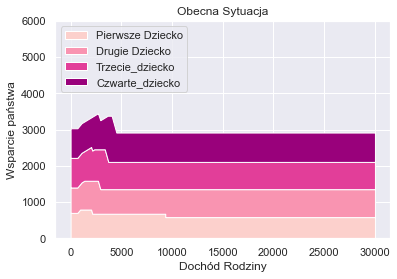

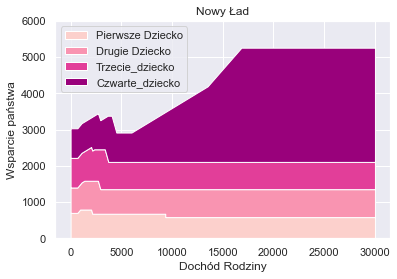

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
baza = pd.read_csv("data/baza.csv").drop("Unnamed: 0", axis=1)
NowyLad = pd.read_csv("data/NowyLad.csv").drop("Unnamed: 0", axis=1)
def plot(baza, title):
    plt.stackplot(baza["Dochod_w_zl"],
                  baza["Pierwsze_dziecko"], 
                  baza["Drugie_dziecko"], 
                  baza["Trzecie_dziecko"], 
                  baza["Czwarte_dziecko"],
                  labels = ["Pierwsze Dziecko",
                           "Drugie Dziecko",
                           "Trzecie_dziecko",
                           "Czwarte_dziecko"],
                 colors = sns.color_palette("RdPu", 4))
    plt.ylim(0,6000)

    plt.legend(loc = 'upper left')
    plt.title(title)
    plt.xlabel('Dochód Rodziny')
    plt.ylabel('Wsparcie państwa')

plot(baza, "Obecna Sytuacja")
plt.show()
plot(NowyLad, "Nowy Ład")
plt.show()

## Uzasadnienie
Nowe wykresy są lepsze, bo są bardziej estetyczne, oraz dlatego, że robienie ich zajęło mi mniej czasu niż w przypadku pd2 